In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from boruta import BorutaPy as bp
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Q1

In [2]:
ingredient_df = pd.read_csv('./ingredient.csv')

## EDA

In [3]:
ingredient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [4]:
ingredient_df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [5]:
# Mssing Value
print(f'There are {ingredient_df.isnull().any().sum()} columns in "ingredient.csv" dataset with missing values.')

There are 0 columns in "ingredient.csv" dataset with missing values.


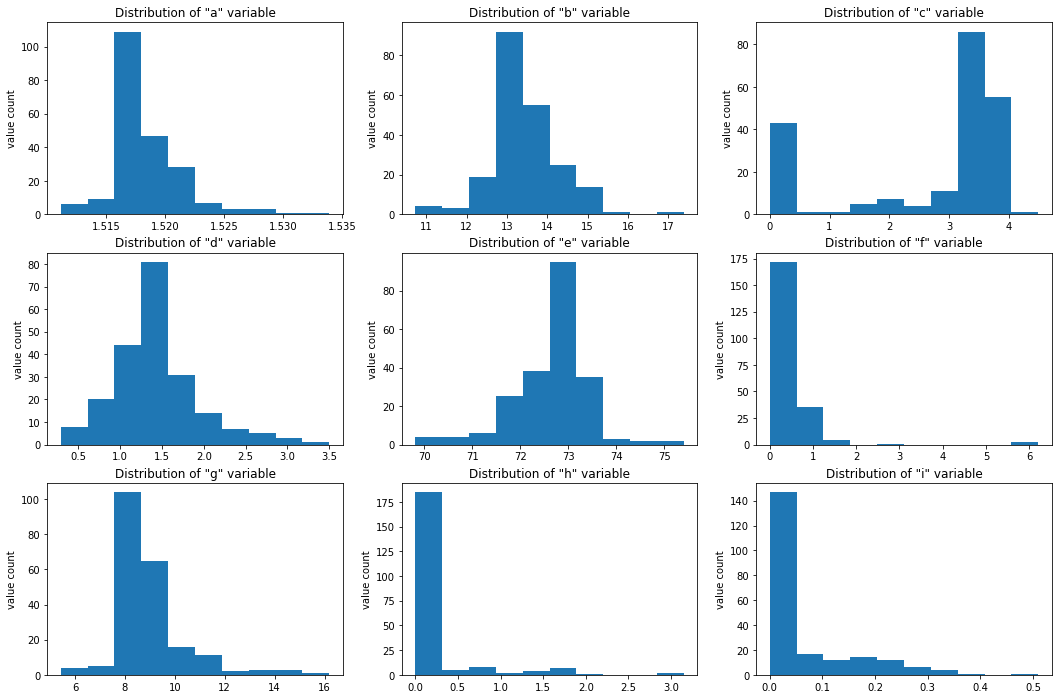

In [6]:
f, ax = plt.subplots(3, 3, figsize = (18, 12))

i = 0
col = list(ingredient_df.columns)

for x in range(0, 3):
    for y in range(0, 3):
        ax[x, y].hist(ingredient_df[col[i]])
        ax[x, y].set_title('Distribution of "{}" variable'.format(col[i]))
        ax[x, y].set_ylabel('value count')
        
        i+=1

From these charts, we can see that most of the data value of each column

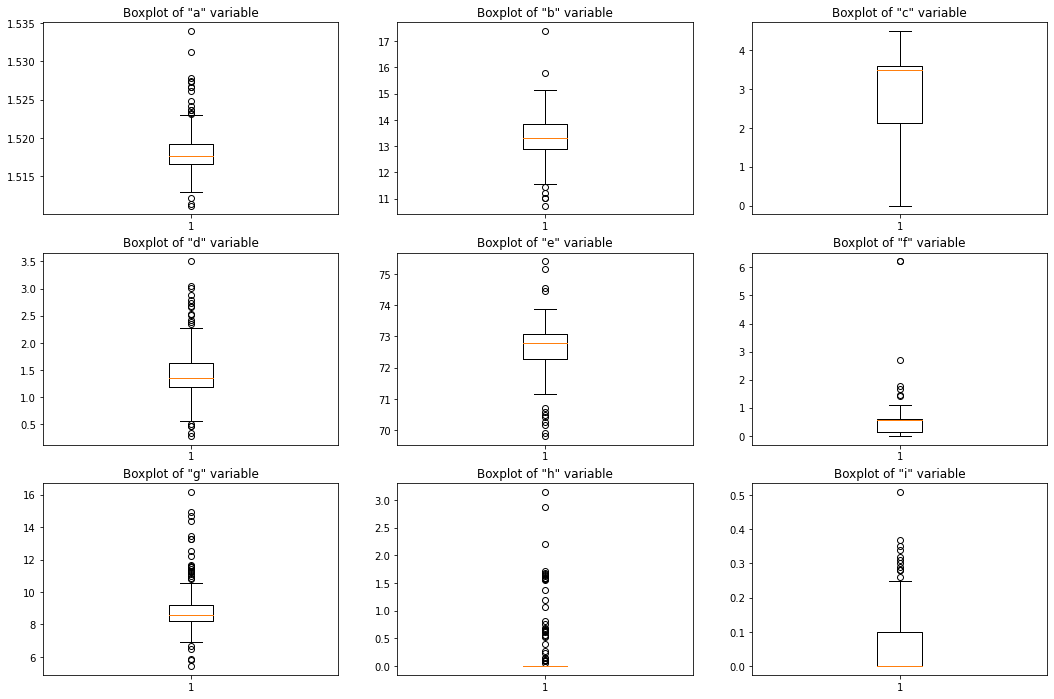

In [7]:
f, ax = plt.subplots(3, 3, figsize = (18, 12))

i = 0
col = list(ingredient_df.columns)

for x in range(0, 3):
    for y in range(0, 3):
        ax[x, y].boxplot(ingredient_df[col[i]])
        ax[x, y].set_title('Boxplot of "{}" variable'.format(col[i]))
        # ax[x, y].set_ylabel('value count')
        
        i+=1

As we can see, 
- most of the boxplots have outliers, except vairable "c". 
- for boxplot of "h" variable, it is because most of the data is 0
- There are some overlapping boxplot such as variable "f" and "i", variable "f" shows upper quartile and median are overlapped while variable "i" shows lower quartile and median are overlapped

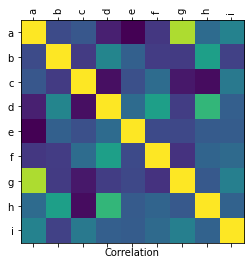

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [8]:
plt.matshow(ingredient_df.corr())
plt.xticks(range(9), ingredient_df.columns.values, rotation='vertical')
plt.yticks(range(9), ingredient_df.columns.values)
plt.xlabel('Correlation')
plt.show()
ingredient_df.corr()

From the heatmap, 
- there is a strong positive correlation between variable "a" and "g"
- there is also a weak negative correlation between variable "c", "g" and "h"

## Clustering

In [9]:
scaler = StandardScaler()
ingredient_scaled = scaler.fit_transform(ingredient_df)

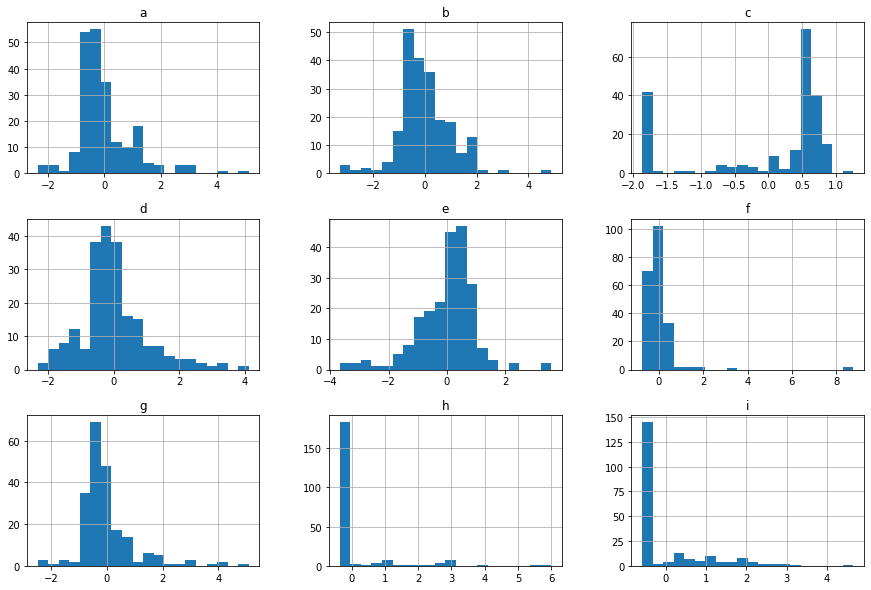

In [10]:
hist_scaled = pd.DataFrame(ingredient_scaled, columns=ingredient_df.columns).hist(figsize=(15, 10), bins=20)

In [11]:
# Reduce the data with PCA into 2 components.
pca2 = PCA(n_components=2)
ingredient_pca2 = pca2.fit_transform(ingredient_scaled)

print('PCA 2 variance ratios: {}'.format(pca2.explained_variance_ratio_))

PCA 2 variance ratios: [0.27901819 0.2277858 ]


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

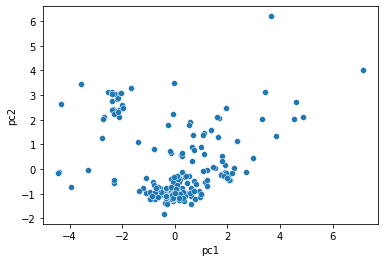

In [12]:
# Visualize the data using the principal components
ingredient_pc2_df = pd.DataFrame(ingredient_pca2, columns=['pc1', 'pc2'])
sns.scatterplot(data=ingredient_pc2_df, x='pc1', y='pc2')

C:\Users\mangyj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

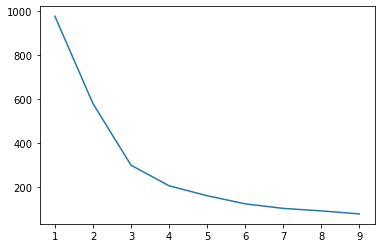

In [13]:
# Cluster using KMeans
# Iterate over various k and use the SSE/Elbow method to define the number of k
numClusters = list(range(1, 10))
sse = []
ingredient_predictions = []
for k in numClusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    ingredient_predictions.append(kmeans.fit_predict(ingredient_pca2))
    sse.append(kmeans.inertia_)

# SSE / Elbow
sns.lineplot(x=numClusters, y=sse)

In [14]:
# Apply cluster IDs to the principal component data
# k=3 is selected from the SSE/Elbow Method
ingredient_pc2_clusters = ingredient_pc2_df.copy()
ingredient_pc2_clusters['cluster_k3'] = ingredient_predictions[2]
ingredient_pc2_clusters

# Apply cluster IDs to the original data
ingredient_df['cluster_k3'] = ingredient_predictions[2]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

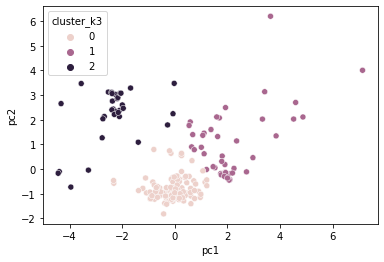

In [15]:
# Visualize the clustered data
sns.scatterplot(data=ingredient_pc2_clusters, x='pc1', y='pc2', hue='cluster_k3')

# Q2

In [16]:
palm_df = pd.read_csv('./palm_ffb.csv')

In [17]:
palm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [18]:
palm_df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [19]:
print(f'There are {palm_df.isnull().any().sum()} columns in "palm_ffb.csv" dataset with missing values.')

There are 0 columns in "palm_ffb.csv" dataset with missing values.


## Correlation

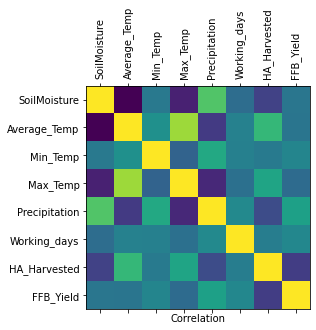

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


In [20]:
palm_corr_df = palm_df.drop(columns=['Date'])

plt.matshow(palm_corr_df.corr())
plt.xticks(range(8), palm_corr_df.columns.values, rotation='vertical')
plt.yticks(range(8), palm_corr_df.columns.values)
plt.xlabel('Correlation')
plt.show()
palm_corr_df.corr()

## Associated between each variables and FFB_Yield

In [21]:
def ffb_time_series_chart(df, selected_chart):
    
    if selected_chart == 'SoilMoisture':
        
        data = [
            go.Bar(
                x = df['Date'],
                y = df['SoilMoisture'],
                name = 'SoilMoisture',
                hovertemplate = 'Date: %{x}<br>' + 'SoilMoisture: %{y}<extra></extra>',
                marker_color = 'grey',
                yaxis = 'y1'
            ),
            go.Scatter(
                x = df['Date'],
                y = df['FFB_Yield'],
                name = 'FFB_Yield',
                hovertemplate = 'Date: %{x}<br>FFB_Yield: %{y}<extra></extra>',
                marker_color = 'green',
                fill = 'tonexty',
                yaxis = 'y2'

            )
        ]
        
        layout = go.Layout(
            xaxis_title = 'Date',
            yaxis = dict(title = 'SoilMoisture'),
            yaxis2 = dict(
                title = 'FFB_Yield',
                overlaying = 'y',
                side = 'right'
            ),
            title = 'FFB_Yield vs SoilMoisture',
            showlegend = True
        )
        
        fig = go.Figure(data = data, layout = layout)
        fig.show()

    elif selected_chart == 'Average_Temp':

        data = [
            go.Bar(
                x = df['Date'],
                y = df['Average_Temp'],
                name = 'Average_Temp',
                hovertemplate = 'Date: %{x}<br>' + 'Average_Temp: %{y}<extra></extra>',
                marker_color = 'grey',
                yaxis = 'y1'
            ),
            go.Scatter(
                x = df['Date'],
                y = df['FFB_Yield'],
                name = 'FFB_Yield',
                hovertemplate = 'Date: %{x}<br>FFB Yield: %{y}<extra></extra>',
                marker_color = 'green',
                fill = 'tonexty',
                yaxis = 'y2'

            )
        ]

        layout = go.Layout(
            xaxis_title = 'Date',
            yaxis = dict(title = 'FFB_Yield'),
            yaxis2 = dict(
                title = 'FFB_Yield',
                overlaying = 'y',
                side = 'right'
            ),
            title = 'FFB Yield vs Average Temp',
            showlegend = True
        )

        fig = go.Figure(data = data, layout = layout)
        fig.show()
        
    elif selected_chart == 'Precipitation':

        data = [
            go.Bar(
                x = df['Date'],
                y = df['Precipitation'],
                name = 'Precipitation',
                hovertemplate = 'Date: %{x}<br>' + 'Precipitation: %{y}<extra></extra>',
                marker_color = 'grey',
                yaxis = 'y1'
            ),
            go.Scatter(
                x = df['Date'],
                y = df['FFB_Yield'],
                name = 'FFB_Yield',
                hovertemplate = 'Date: %{x}<br>FFB Yield: %{y}<extra></extra>',
                marker_color = 'green',
                fill = 'tonexty',
                yaxis = 'y2'

            )
        ]

        layout = go.Layout(
            xaxis_title = 'Date',
            yaxis = dict(title = 'Precipitation'),
            yaxis2 = dict(
                title = 'FFB_Yield',
                overlaying = 'y',
                side = 'right'
            ),
            title = 'FFB Yield vs Precipitation',
            showlegend = True
        )

        fig = go.Figure(data = data, layout = layout)
        fig.show()
            
    elif selected_chart == 'Working_days':

        data = [
            go.Bar(
                x = df['Date'],
                y = df['Working_days'],
                name = 'Working_days',
                hovertemplate = 'Date: %{x}<br>' + 'Working_days: %{y}<extra></extra>',
                marker_color = 'grey',
                yaxis = 'y1'
            ),
            go.Scatter(
                x = df['Date'],
                y = df['FFB_Yield'],
                name = 'FFB_Yield',
                hovertemplate = 'Date: %{x}<br>FFB Yield: %{y}<extra></extra>',
                marker_color = 'green',
                fill = 'tonexty',
                yaxis = 'y2'

            )
        ]

        layout = go.Layout(
            xaxis_title = 'Date',
            yaxis = dict(title = 'Working_days'),
            yaxis2 = dict(
                title = 'FFB_Yield',
                overlaying = 'y',
                side = 'right'
            ),
            title = 'FFB Yield vs Working_days',
            showlegend = True
        )

        fig = go.Figure(data = data, layout = layout)
        fig.show()
        
    elif selected_chart == 'HA_Harvested':
        
        data = [
            go.Bar(
                x = df['Date'],
                y = df['HA_Harvested'],
                name = 'HA_Harvested',
                hovertemplate = 'Date: %{x}<br>' + 'HA_Harvested: %{y}<extra></extra>',
                marker_color = 'grey',
                yaxis = 'y1'
            ),
            go.Scatter(
                x = df['Date'],
                y = df['FFB_Yield'],
                name = 'FFB_Yield',
                hovertemplate = 'Date: %{x}<br>FFB Yield: %{y}<extra></extra>',
                marker_color = 'green',
                fill = 'tonexty',
                yaxis = 'y2'

            )
        ]

        layout = go.Layout(
            xaxis_title = 'Date',
            yaxis = dict(title = 'HA_Harvested'),
            yaxis2 = dict(
                title = 'FFB_Yield',
                overlaying = 'y',
                side = 'right'
            ),
            title = 'FFB Yield vs HA_Harvested',
            showlegend = True
        )

        fig = go.Figure(data = data, layout = layout)
        fig.show()
            

In [22]:
@interact

def show_chart(Chart = ['SoilMoisture', 'Average_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']):
    return ffb_time_series_chart(palm_df, Chart)

interactive(children=(Dropdown(description='Chart', options=('SoilMoisture', 'Average_Temp', 'Precipitation', …

- SoilMoisture has positive associated with FFB_Yield
- Average_Temp do not has significant associated with FFB_Yield
- Precipitation has positive associated with FFB_Yield
- Working_days do not has significant associated with FFB_Yield\
- HA_Harvested has negative associated with FFB_Yield

## Feature Selection

In [23]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

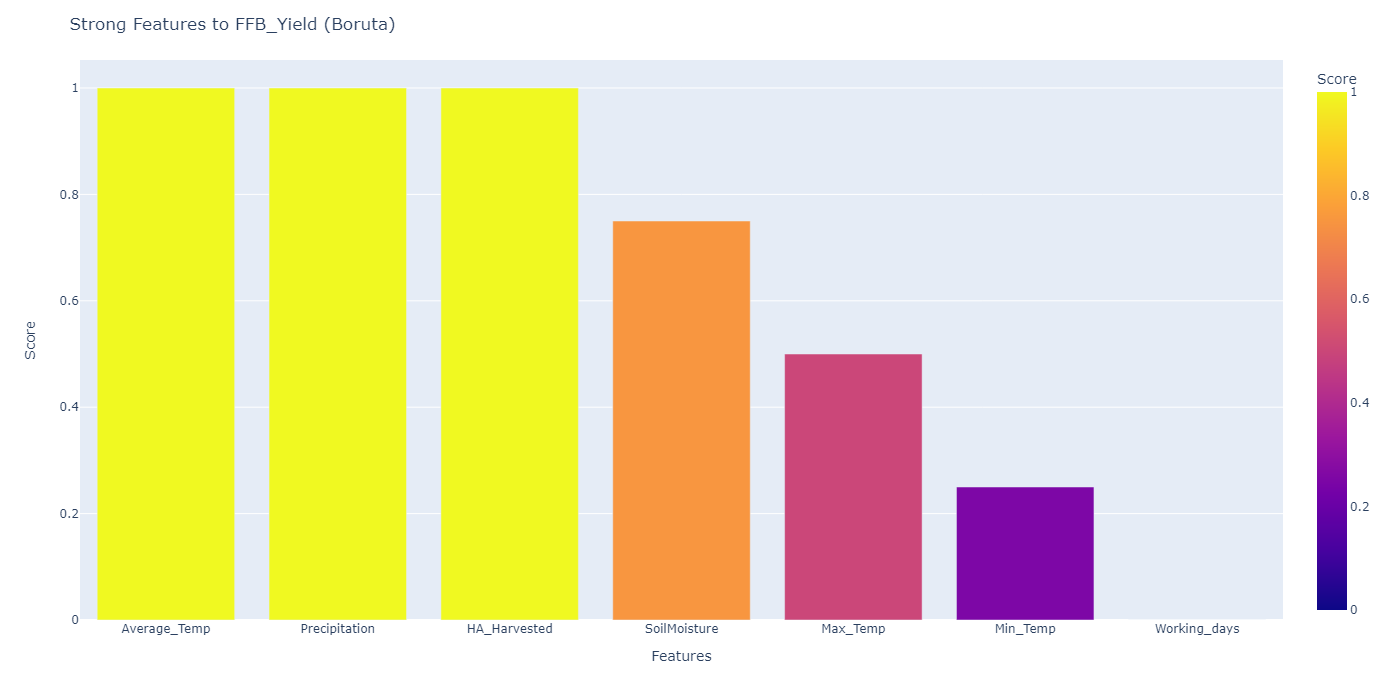

In [24]:
X = palm_df.drop(columns=['Date', 'FFB_Yield'])
y = palm_df['FFB_Yield']

rf = RandomForestRegressor(n_jobs= 4,oob_score= True)
feat_selector = bp(rf, n_estimators = 'auto', random_state = 1)

feat_selector.fit(X.values, y.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), X.columns, order = -1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns = ['Features','Score'])
boruta_score = boruta_score.sort_values('Score', ascending = False)

fig = px.bar(boruta_score, x='Features', y='Score', color='Score', height=700)
fig.update_layout(title='Strong Features to FFB_Yield (Boruta)')
fig.show()

Strong Features to FFB_Yield
1. Average_Temp, Precipitation, HA_Harvested
2. SoilMoisture
3. Max_Temp
4. Min_Temp
5. Working_days